# Wahlomat - Datenanalyse

In [3]:
# importe 
import numpy as np 
import matplotlib.pyplot as plt 
from graph_tool.all import *

In [4]:
# euklidian distance in 38d-space
def calc_euklidian_dist(list1, list2): 
    if len(list1) != len(list2): 
        print("ungleich lange listen, exiting ...")
        return -1
    return np.sqrt( sum([  (list1[i]-list2[i])**2  for i in range(len(list1))] ))


In [38]:
# data (encoded: 1=yes, 2=maybe, 3=no)  
SPD     = [1,3,3,1,3,3,2,3,1,1,1,1,1,1,1,1,2,1,3,1,3,3,1,1,3,3,3,3,1,3,3,1,1,1,3,3,1,1]
CDU     = [1,1,3,3,3,3,1,1,1,1,1,3,2,1,3,3,1,3,1,1,1,3,1,1,3,1,1,1,1,1,1,1,3,1,1,1,2,3]
gruen   = [3,3,1,1,3,1,2,3,1,1,3,1,3,3,2,1,1,3,3,1,1,3,2,1,1,3,3,3,1,3,3,2,1,3,3,3,1,1]
links   = [3,3,3,1,3,1,3,3,1,1,3,1,1,3,1,1,1,1,3,1,3,1,3,1,2,3,3,3,1,3,3,3,1,3,3,3,1,1]
fdp     = [1,1,3,3,1,3,1,3,3,1,1,3,3,1,3,3,3,3,1,3,1,1,1,1,3,3,1,1,3,1,3,1,3,1,1,1,3,1]
afd     = [1,1,3,3,2,3,1,1,3,1,3,3,1,1,3,3,3,3,1,1,3,1,1,1,3,3,1,1,1,1,1,2,3,1,2,1,3,2]
biw     = [1,1,3,1,3,3,1,1,1,1,3,3,1,1,1,3,3,3,1,3,2,3,1,1,3,3,1,3,3,1,3,1,3,1,1,2,3,1]
partei  = [3,1,3,1,1,1,3,3,1,1,3,1,1,3,1,1,1,1,1,3,1,1,3,1,1,3,3,3,1,3,1,1,1,3,3,3,3,1]
piraten = [3,3,3,1,3,1,3,3,1,1,3,1,1,3,1,1,3,1,3,1,3,1,3,1,3,3,3,3,1,3,3,3,1,3,3,3,2,1]
bge     = [3,3,3,1,3,1,1,3,1,1,2,1,1,2,3,1,1,1,3,2,3,1,1,1,3,3,3,3,1,3,1,3,3,3,3,3,1,1]
rechts  = [1,1,3,1,3,3,1,3,1,3,1,3,1,1,1,3,3,1,1,1,3,1,1,3,1,1,3,1,1,1,2,3,1,3,3,1,1,1]
frei    = [3,1,1,3,2,3,1,1,1,3,3,3,3,1,2,2,3,1,1,3,1,1,1,1,3,2,3,3,1,1,1,1,1,1,2,1,3,3]
MenWelt = [3,3,3,1,3,1,2,3,1,2,3,1,1,1,3,1,1,1,3,1,2,1,3,1,3,2,3,3,1,2,3,2,2,3,3,3,3,1]
human   = [2,2,3,1,1,1,1,3,1,1,2,3,1,1,3,2,1,1,1,1,1,2,3,1,3,2,3,2,1,2,1,1,3,1,3,1,2,1]
v3      = [3,3,1,1,3,1,1,3,1,1,3,1,1,3,3,1,1,1,1,1,1,1,2,1,1,3,3,1,1,3,1,3,1,3,3,3,3,1]
WIR     = [3,3,1,1,3,1,1,3,1,1,3,1,1,2,1,1,1,1,3,1,1,1,3,1,3,3,3,1,1,3,1,1,1,1,3,3,1,1]

parteinames =  ["SPD","CDU","gruen","links","fdp","afd","biw","partei","piraten","bge","rechts","frei","MenWelt","human","v3","WIR"]

questions = ["1.Außenweser vertiefen?.",
"2.Ab der dritten Klasse Noten erhalten?.",
"3.Rauchen in allen Gaststätten verboten werden.",
"4.Beim Neubau höherer Anteil f.sozialen Wohnungsbau vorgesehen sein.",
"5.Mehr verkaufsoffene Sonntage.",
"6.Straßen-Aus- und Umbau Radverkehr gegenüber dem Autoverkehr bevorzugen.",
"7.Das Land Bremen soll Projekte gegen Linksextremismus finanziell unterstützen.",
"8.Die Polizei soll Kontrollen auch verdachtsunabhängig durchführen dürfen.",
"9.Die Ticketpreise für den ÖPNV sollen gesenkt werden.",
"10.Erinnerung an den Holocaust soll zentraler Bestandteil des geschichtsorientierten Unterrichts bleiben.",
"11.Das Offshore-Terminal Bremerhaven soll gebaut werden.",
"12.Frauenquote für Führungspositionen in landeseigenen Betrieben.",
"13.Der Verwaltungskostenbeitrag an den Hochschulen des Landes Bremen soll abgeschafft werden.",
"14.Ausreisepflichtige Ausländerinnen und Ausländer konsequent abschieben.",
"15.Die Förderung der Jacobs University soll eingestellt werden.",
"16.Auf weiteren innerstädtischen Straßen soll Tempo 30 gelten.",
"17.Unbegleitete minderjährige Flüchtlinge sollen in Bremen und Bremerhaven stärker unterstützt werden.",
"18.Die kommunale Grundversorgung (Gas, Wasser, Strom und Abfall) soll vollständig in öffentlicher Hand sein.",
"19.Das “Sitzenbleiben” an Schulen in Bremen und Bremerhaven soll wieder eingeführt werden.",
"20.Die Straßenbahnlinien 1 und 8 sollen über Huchting hinaus verlängert werden.",
"21.Das Land Bremen soll Pflegekräfte aus dem Ausland anwerben.",
"22.Die Hürden für Volksentscheide im Land Bremen sollen gesenkt werden.",
"23.Das Gymnasium soll als Schulform dauerhaft erhalten bleiben.",
"24.Das Land Bremen soll Projekte gegen Rechtsextremismus finanziell unterstützen.",
"25.Das Wahlalter bei Bürgerschaftswahlen soll auf 14 Jahre gesenkt werden.",
"26.Die Sanierungshilfen des Bundes sollen im Land Bremen ausschließlich zum Schuldenabbau genutzt werden.",
"27.Die Kennzeichnungspflicht für Polizisten bei Großeinsätzen soll abgeschafft werden.",
"28.Die Grunderwerbssteuer im Land Bremen soll gesenkt werden.",
"29.Die kommunalen Kliniken im Land Bremen sollen in öffentlicher Hand bleiben.",
"30.Maghreb-Staaten (Tunesien, Algerien und Marokko) als sichere Herkunftsstaaten gelten.",
"31.Das letzte Kita-Jahr vor der Einschulung soll für alle Kinder verpflichtend sein.",
"32.Der Bremer Verfassungsschutz soll auf V-Leute zurückgreifen dürfen.",
"33.Betriebe, die nicht ausbilden, sollen eine Abgabe zahlen.",
"34.Die Polizei soll mit Elektroschockpistolen („Tasern”) ausgestattet werden.",
"35.Empfängern von ALGII sollen auch weiterhin Leistungen gekürzt werden, wenn sie die Aufnahme einer zumutbaren Arbeit ablehnen.",
"36.An den Hochschulen des Landes Bremen soll für militärische Zwecke geforscht werden dürfen.",
"37.Auf dem Gelände der Bremer Galopprennbahn sollen Wohnungen gebaut werden.",
"38.Im Land Bremen sollen private Partys auch weiterhin auf öffentlichen Freizeit- und Erholungsflächen stattfinden dürfen."
]

list_of_lists       = [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR]
N_analyzed_parties  = len(list_of_lists)
print("N_analyzed_parties", N_analyzed_parties)
N_fragen = 38

# calculate euklidian distances:
euklidian_distances = np.zeros((N_analyzed_parties, N_analyzed_parties), dtype=float)
for i in range( N_analyzed_parties ):# [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
    for j in range( N_analyzed_parties ):  # [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
        euklidian_distances[i][j] = calc_euklidian_dist( list_of_lists[i], list_of_lists[j] )

for partei_list in list_of_lists:
    for antwort in range(N_fragen) :
        tmp = [ "J","V","N" ][(partei_list[antwort])-1]
        counter = int(antwort)   + 1 
        partei_list[antwort] = "Q"+str(antwort).zfill(2) + "A" +  tmp


overlap = np.zeros(( N_analyzed_parties ,N_analyzed_parties ), dtype="float")
for i in range( N_analyzed_parties ): 
    for j in range( N_analyzed_parties ):
        if i != j:
            overlap[i][j] = round(len(list( set( list_of_lists[i]).intersection(set( list_of_lists[j] )) ))/N_fragen , 4)
print("test overlap", overlap[10])

N_analyzed_parties 16
test overlap [0.5526 0.5    0.3421 0.5    0.4737 0.5    0.4737 0.4474 0.5    0.4737
 0.     0.4474 0.3947 0.4211 0.5    0.4474]


In [6]:
# short test, max overlap
print("test: SPD[2]:", SPD[2], " --- sollte  Q02AN sein")
print(np.max(overlap))
print("max overlap zwischen",parteinames[np.argmax(overlap)%16], "und", parteinames[int(np.argmax(overlap)/16)])

test: SPD[2]: Q02AN  --- sollte  Q02AN sein
0.9211
max overlap zwischen piraten und links


In [7]:
# print all overlaps over 75% to get a first impression
for ii in range(16):
    for jj in range(16): 
        if ii != jj and ii<jj: 
            ovl = round(len(list( set( list_of_lists[ii] ).intersection(set( list_of_lists[jj] )) ))/N_fragen,4)
            if ovl > 0.75:
                print("parteien: ", parteinames[ii], parteinames[jj], ovl)

parteien:  links partei 0.7632
parteien:  links piraten 0.9211
parteien:  links bge 0.7632
parteien:  links WIR 0.7632
parteien:  partei v3 0.7632
parteien:  v3 WIR 0.7895


In [8]:
# initialize graph "diagramm" and its property-maps 
diagramm = graph_tool.Graph()
diagramm.set_directed(False)
# property_maps 
couplings         = diagramm.new_edge_property("float")
couplings_re      = diagramm.new_edge_property("float")
couplings_eukl_38 = diagramm.new_edge_property("float")
couplings_text    = diagramm.new_edge_property("string")
vertex_labels_by_party = diagramm.new_vertex_property("string")          # doubles
couplings = diagramm.new_edge_property("float")

# add vertices and save the descriptors to a list
vertices = []
for xx in parteinames: 
    vertices.append(diagramm.add_vertex())

# assign labels as property-map
for qq in range(len(parteinames)): 
    vertex_labels_by_party[vertices[qq]] = parteinames[qq]

In [9]:
# fill the other property-maps
edge_descriptors = np.zeros((16,16), dtype=np.dtype(object) )
print("test edge_descriptors [1][1] ", edge_descriptors[1][1])
min_overlap = np.amin(overlap)
for vertex1 in diagramm.vertices(): 
    for vertex2 in diagramm.vertices(): 
        # no self-loops
        if vertex1 != vertex2: 
            index1 = parteinames.index(vertex_labels_by_party[vertex1])
            index2 = parteinames.index(vertex_labels_by_party[vertex2])
            if overlap[index1][index2] > 0.5:
                a = diagramm.add_edge(vertex1, vertex2)
                edge_descriptors[ index1 ][ index2 ] = a
                couplings[a] = overlap[index1][index2]
                couplings_re[a] = overlap[index1][index2] - min_overlap
                couplings_text[a] = str(round(100*overlap[index1][index2],1))+"%"
                couplings_eukl_38[a] = euklidian_distances[index1][index2]
            #print("edge_descriptors[ index1 ][ index2 ]", edge_descriptors[ index1 ][ index2 ])


test edge_descriptors [1][1]  0


### Now: different layouts

In [10]:
# use cool spring-layouting algorithm
positions1 = sfdp_layout(diagramm, eweight=couplings)
positions2 = sfdp_layout(diagramm, eweight=couplings_eukl_38)
positions3 = radial_tree_layout(diagramm, vertices[13] , weighted=True)

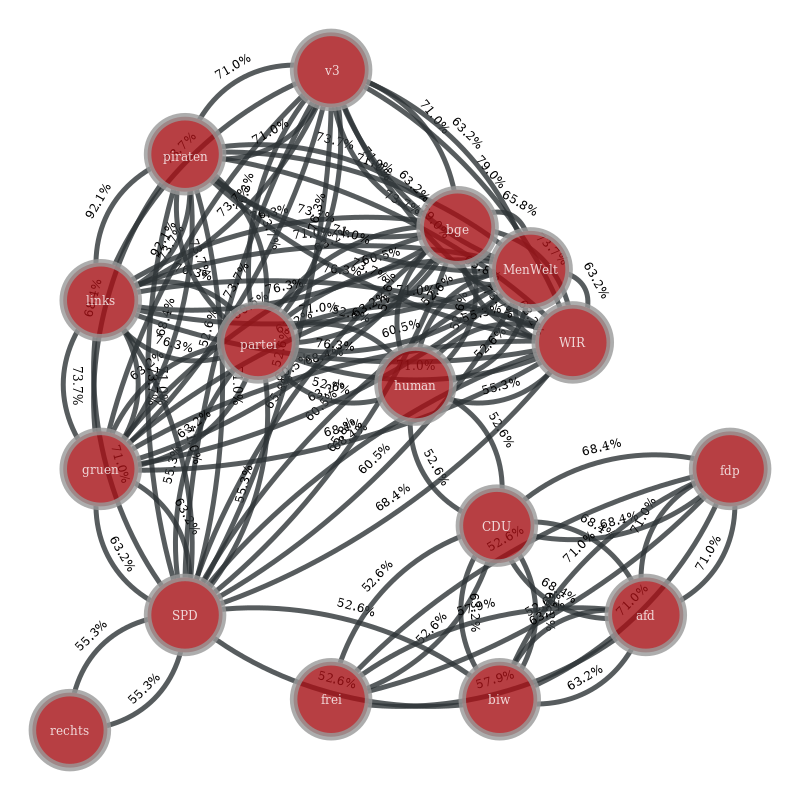

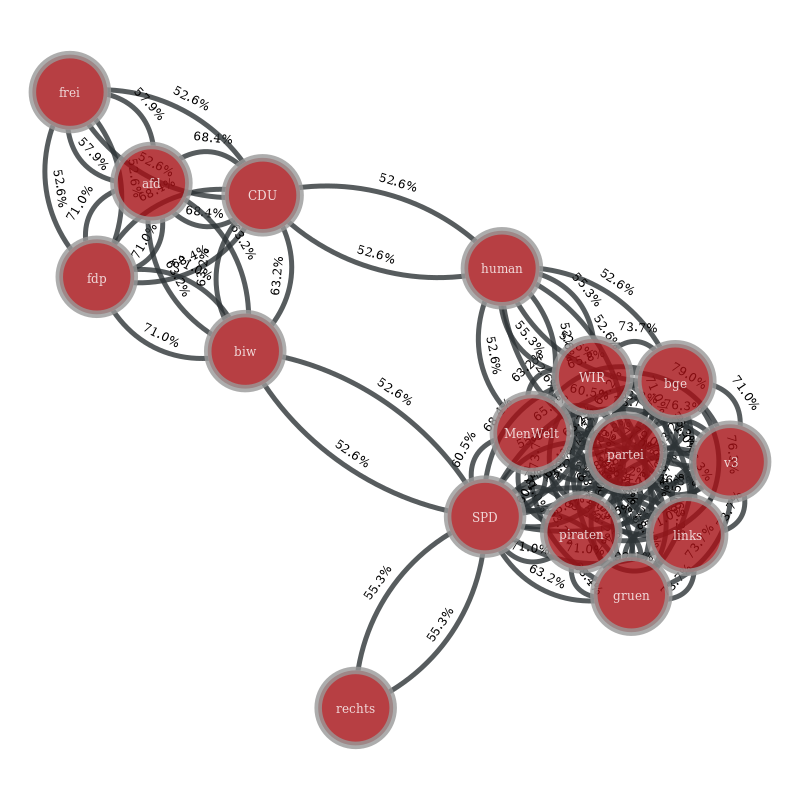

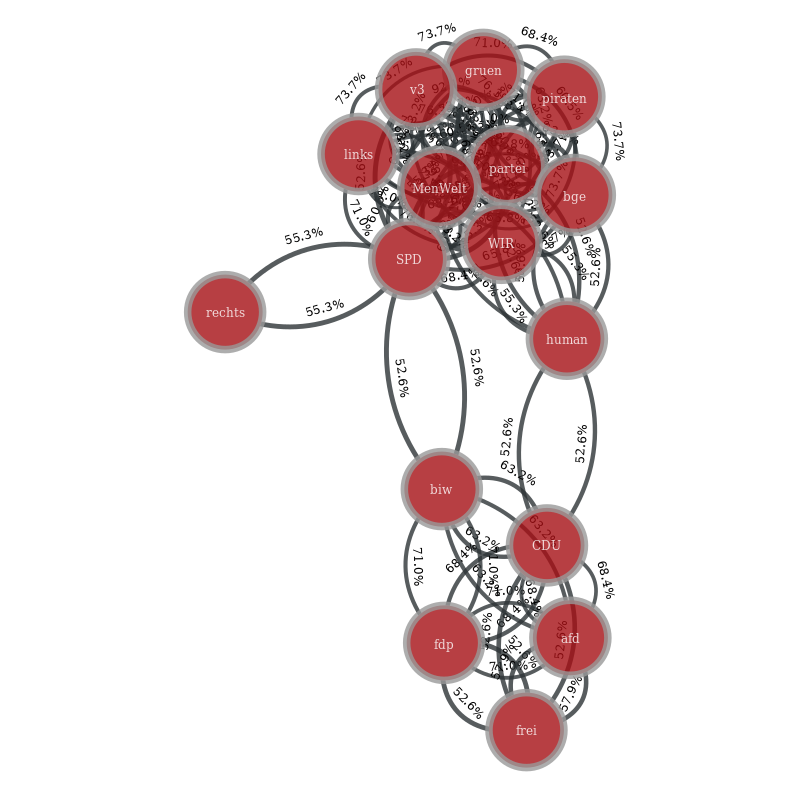

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f7fcaeb0780, at 0x7f7fcaeb01d0>

In [11]:
# plot the whole thing  
graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings, mi=5),
            pos=positions3,
            edge_text=couplings_text,
            bg_color=[255,255,255,1],
            )

graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings, mi=5),
            pos=positions1,
            edge_text=couplings_text,
            bg_color=[255,255,255,1],
            )

graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings_eukl_38),
            pos=positions2,
            edge_text=couplings_text,
            bg_color=[255,255,255,1],
            )

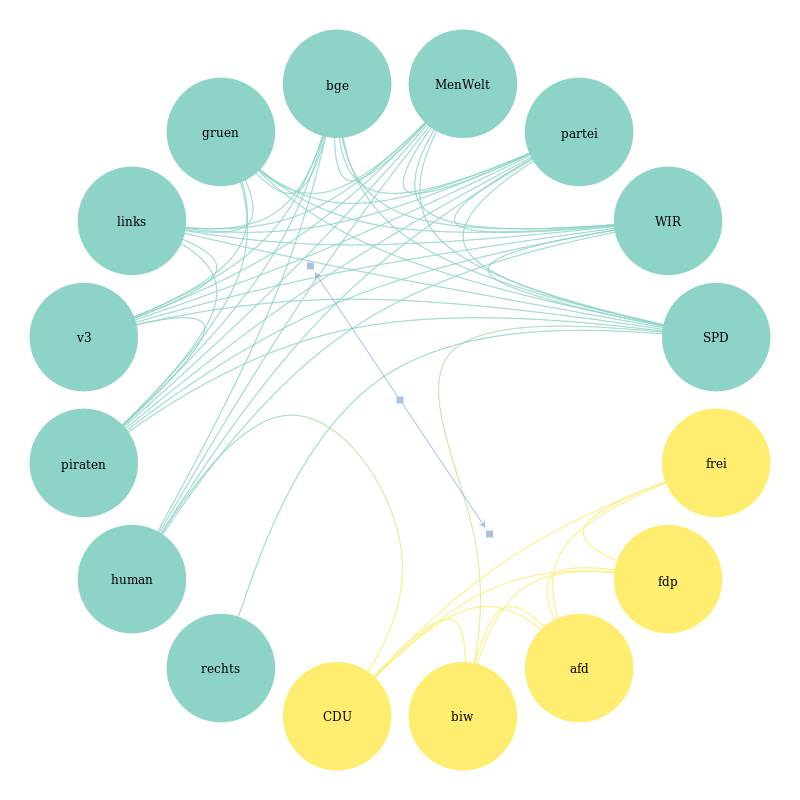

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f7fcaeb0780, at 0x7f7fcaeacb00>,
 <Graph object, directed, with 19 vertices and 18 edges at 0x7f7fcaeb0e48>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f7fcaeb0e48, at 0x7f7fcaeeda58>)

In [12]:
# algorithm to find clusters/hierarchy
beta_s = 0.8  # "strength" to be used to investigate clusters
state = minimize_nested_blockmodel_dl(diagramm, deg_corr=True)
draw_hierarchy(state, output="diagramm_nested_model.pdf")
draw_hierarchy(state, output="diagramm_nested_model.png", vertex_text=vertex_labels_by_party, bg_color=[255,255,255,1])
draw_hierarchy(state,beta=beta_s, output_size=(800,800) , 
                   vertex_text=vertex_labels_by_party, 
                   vertex_size=100
)


In [13]:
# UNDER CONSTRUCTION: Principal Component Analysis (when i have the time)
# short googling yields the following:
# from matplotlib.mlab import PCA
# pca = PCA(np.transpose(data))

In [26]:
# which party has the most "dont know"-Answers?
# list_of_lists       = [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR]
N_maybe_answers = []
N_yes_answers = []
N_no_answers = []
for party in list_of_lists: 
    N_maybe_answers.append( sum( [1 for q in party if q[-1:]=="V"] ) )
    N_yes_answers.append( sum( [1 for q in party if q[-1:]=="J"] ) )
    N_no_answers.append( sum( [1 for q in party if q[-1:]=="N"] ) )

print("maybes", N_maybe_answers)    
print("yes   ", N_yes_answers)
print("no    ", N_no_answers)
print("most maybe", parteinames[ np.argmax(N_dunno_answers)])
print("least maybe", parteinames[ np.argmin(N_dunno_answers)])

print("most yes", parteinames[ np.argmax(N_yes_answers)])
print("least yes", parteinames[ np.argmin(N_yes_answers)])

print("most no", parteinames[ np.argmax(N_no_answers)])
print("least no", parteinames[ np.argmin(N_no_answers)])


maybes [2, 2, 4, 1, 0, 4, 2, 0, 1, 3, 1, 5, 7, 9, 1, 1]
yes    [20, 24, 16, 17, 20, 19, 19, 22, 15, 17, 23, 19, 14, 20, 22, 24]
no     [16, 12, 18, 20, 18, 15, 17, 16, 22, 18, 14, 14, 17, 9, 15, 13]
most maybe human
least maybe fdp
most yes CDU
least yes MenWelt
most no piraten
least no human


In [46]:
# which question is most/least controversial?
answers = [] # list for each answer with a dict : yes:N_y , no:N_n, maybe:N_m
for counter in range(N_fragen): 
    answers.append( { "J":0 , "N":0 , "V":0} )
# print("answers", answers)

for party in list_of_lists: 
    counter = 0
    for single_answer in party: 
        answers[counter][single_answer[-1:]] += 1
        counter += 1
# print("answers", answers)

import operator
counter = 0
for each in answers:
    print( questions[counter],  max(each.items(), key=operator.itemgetter(1))[0])
    counter += 1

answers [{'J': 6, 'N': 9, 'V': 1}, {'J': 7, 'N': 8, 'V': 1}, {'J': 4, 'N': 12, 'V': 0}, {'J': 12, 'N': 4, 'V': 0}, {'J': 3, 'N': 11, 'V': 2}, {'J': 9, 'N': 7, 'V': 0}, {'J': 10, 'N': 3, 'V': 3}, {'J': 4, 'N': 12, 'V': 0}, {'J': 14, 'N': 2, 'V': 0}, {'J': 13, 'N': 2, 'V': 1}, {'J': 4, 'N': 10, 'V': 2}, {'J': 9, 'N': 7, 'V': 0}, {'J': 12, 'N': 3, 'V': 1}, {'J': 9, 'N': 5, 'V': 2}, {'J': 7, 'N': 7, 'V': 2}, {'J': 9, 'N': 5, 'V': 2}, {'J': 9, 'N': 6, 'V': 1}, {'J': 11, 'N': 5, 'V': 0}, {'J': 9, 'N': 7, 'V': 0}, {'J': 11, 'N': 4, 'V': 1}, {'J': 8, 'N': 6, 'V': 2}, {'J': 11, 'N': 4, 'V': 1}, {'J': 8, 'N': 6, 'V': 2}, {'J': 15, 'N': 1, 'V': 0}, {'J': 4, 'N': 11, 'V': 1}, {'J': 2, 'N': 11, 'V': 3}, {'J': 4, 'N': 12, 'V': 0}, {'J': 6, 'N': 9, 'V': 1}, {'J': 14, 'N': 2, 'V': 0}, {'J': 6, 'N': 8, 'V': 2}, {'J': 8, 'N': 7, 'V': 1}, {'J': 8, 'N': 5, 'V': 3}, {'J': 9, 'N': 6, 'V': 1}, {'J': 8, 'N': 8, 'V': 0}, {'J': 3, 'N': 11, 'V': 2}, {'J': 6, 'N': 9, 'V': 1}, {'J': 6, 'N': 7, 'V': 3}, {'J': 13, '